In [1]:
import numpy as np
import pandas as pd
import copy as cp
import matplotlib.pyplot as plt

In [2]:
# Set as 0 if using results from no control simulation
# Set as 1 if using results from control, flow/TSS load simulation
# Set as 2 if using results from control, flow simulation
# Set as 3 if using results from control, TSS load simulation
save = 2

stormNo = '3'

# Load storm event data (LBC results, for sewer subsection only)
# WRRF flow is in units of cubic feet/sec
# WRRF TSS load is in units of lb/sec
# WRRF TSS concentration is in units of mg/L
storm_nocontrol = np.load('../data/storm'+stormNo+'.npy', allow_pickle=True)

if save == 0:
    storm = cp.deepcopy(storm_nocontrol)
    file_c = 'nc'
elif save == 1:
    storm_control = np.load('../data/storm'+stormNo+'_control_both.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_both'
elif save == 2:
    storm_control = np.load('../data/storm'+stormNo+'_control_flow.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_flow'
elif save == 3:
    storm_control = np.load('../data/storm'+stormNo+'_control_TSS.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_TSS'

# File name for influent tsv
w_influentTSV = 'C:/Users/Sara/Desktop/sewerWRRF/data/storm'+stormNo+'_'+file_c+'_influent.tsv'

In [3]:
# Check storm event data contents
storm

array({'time': array([[28.],
       [28.],
       [28.],
       ...,
       [37.],
       [37.],
       [37.]], dtype=float16), 'WRRF_flow': array([[207.91048],
       [207.91217],
       [207.91388],
       ...,
       [203.41035],
       [203.41219],
       [203.41402]], dtype=float32), 'WRRF_TSSLoad': array([[2.042799 ],
       [2.0428915],
       [2.042984 ],
       ...,
       [2.0144691],
       [2.0145605],
       [2.0146513]], dtype=float32), 'WRRF_TSSConc': array([[157.3430027 ],
       [157.34883991],
       [157.35467712],
       ...,
       [158.59362882],
       [158.59938382],
       [158.60510593]]), 'WRRF_flow_dry': array([203.55081177, 203.55271912, 203.55462646, ..., 203.41035461,
       203.41218567, 203.41401672]), 'WRRF_TSSLoad_dry': array([2.02009106, 2.0201838 , 2.02027655, ..., 2.01446915, 2.01456046,
       2.0146513 ]), 'WRRF_flow_wet': array([4.35966492, 4.35945129, 4.35925293, ..., 0.        , 0.        ,
       0.        ]), 'WRRF_TSSLoad_wet': array([0.022

Text(0, 0.5, 'Sewer Flow (m3/s)')

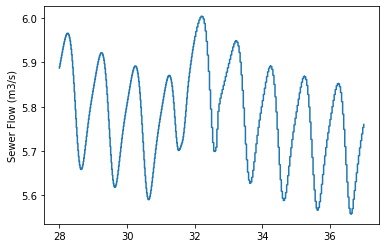

In [4]:
# Flow in sewer subsection (only)
# Units of m3/s (converted from ft3/s)
sewer_flow = storm.item().get('WRRF_flow') / 35.3147
plt.plot(storm.item().get('time'),sewer_flow)
plt.ylabel('Sewer Flow (m3/s)')

Text(0, 0.5, 'Sewer TSS Concentration (mg/L)')

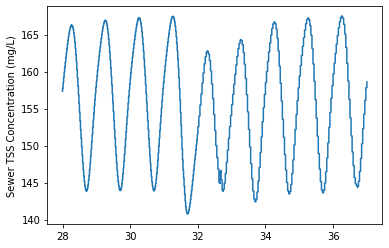

In [5]:
# TSS load in sewer subsection (only)
plt.plot(storm.item().get('time'),storm.item().get('WRRF_TSSConc'))
plt.ylabel('Sewer TSS Concentration (mg/L)')

Text(0, 0.5, 'NO CONTROL Sewer Flow (m3/s)')

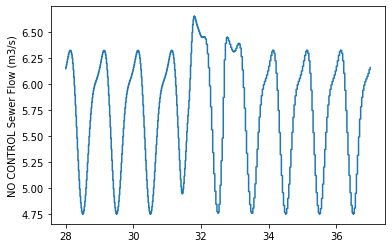

In [6]:
# Flow in sewer subsection (only)
# NO CONTROL results shown here
# Units of m3/s (converted from ft3/s)
plt.plot(storm_nocontrol.item().get('time'),storm_nocontrol.item().get('WRRF_flow') / 35.3147)
plt.ylabel('NO CONTROL Sewer Flow (m3/s)')

5.667736614537754

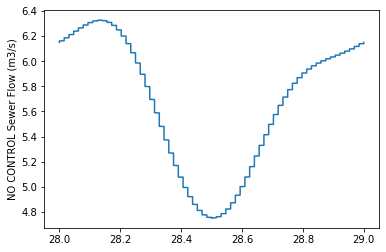

In [7]:
# Plot section that is dry-weather only
# Will average over this section to get dry-weather average value
# This is done for the NO CONTROL results shown above
# Units of m3/s (converted from ft3/s)
# Storm 1: 8:-1
# Storm 2: 0:1
# Storm 3: 0:1

dw_start = 0*24*60*60/10
dw_end = 1*24*60*60/10
plt.plot(storm_nocontrol.item().get('time')[int(dw_start):int(dw_end)],storm_nocontrol.item().get('WRRF_flow')[int(dw_start):int(dw_end)] / 35.3147)
plt.ylabel('NO CONTROL Sewer Flow (m3/s)')

# Units of m3/s
seweroutflow = np.mean(storm_nocontrol.item().get('WRRF_flow')[int(dw_start):int(dw_end)]) / 35.3147
seweroutflow

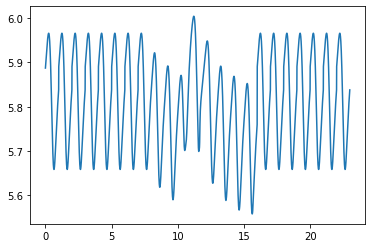

In [8]:
# IF NO CONTROL, RUN THIS

dw_flow_begin = []
dw_flow_end = []
dw_TSSConc_begin = []
dw_TSSConc_end = []
nodwdays_begin = 7
nodwdays_end = 7

# Storm 1: 10-1
# Storm 2: 53-35
# Storm 3: 37-28
nostormdays = 37-28

time_storm = np.linspace(0.,nodwdays_begin+nostormdays+nodwdays_end,num=int((nodwdays_begin+nostormdays+nodwdays_end)*24*60*60/10))

for _ in range(0,nodwdays_begin):
    dw_flow_begin = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_begin)
    dw_TSSConc_begin = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_begin)

for _ in range(0,nodwdays_end):
    dw_flow_end = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_end)
    dw_TSSConc_end = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_end)

sewer_flow = np.append(dw_flow_begin,np.append(sewer_flow,dw_flow_end))
WRRF_TSSConc = np.append(dw_TSSConc_begin,np.append(storm.item().get('WRRF_TSSConc'),dw_TSSConc_end))

plt.plot(time_storm,sewer_flow)

In [ ]:
plt.plot(time_storm[0:nodwdays_begin*8640],dw_flow_begin)
plt.plot(time_storm[0:nostormdays*8640],sewer_flow[nodwdays_begin*8640:(nodwdays_begin+nostormdays)*8640])
#plt.xlim((2.,2.3))

In [ ]:
# IF CONTROL AND STORM 1, RUN THIS
# Need for pre-storm and storm flow, etc. to line up

dw_flow_begin = []
dw_flow_end = []
dw_TSSConc_begin = []
dw_TSSConc_end = []
nodwdays_begin = 7
nodwdays_end = 7

# Storm 1: 10-1
# Storm 2: 53-35
# Storm 3: 37-28
nostormdays = 10-1

# Storm 1: 2.1
# Storm 2: RUN ABOVE 'NO CONTROL' CELL; NO EXTRA BIT
# Storm 3: RUN ABOVE 'NO CONTROL' CELL; NO EXTRA BIT
extra_bit = 0

time_storm = np.linspace(0.,nodwdays_begin+nostormdays+nodwdays_end,num=int((nodwdays_begin+nostormdays+nodwdays_end)*24*60*60/10))

for _ in range(0,nodwdays_begin):
    dw_flow_begin = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_begin)
    dw_TSSConc_begin = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_begin)
dw_flow_begin = np.append(dw_flow_begin,dw_flow_begin[0:int(extra_bit*24*60*60/10+1)])
dw_TSSConc_begin = np.append(dw_TSSConc_begin,dw_TSSConc_begin[0:int(extra_bit*24*60*60/10+1)])

for _ in range(0,nodwdays_end):
    dw_flow_end = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_end)
    dw_TSSConc_end = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_end)

sewer_flow = sewer_flow[int(extra_bit*24*60*60/10):-1]
WRRF_TSSConc = storm.item().get('WRRF_TSSConc')[int(extra_bit*24*60*60/10):-1]

sewer_flow = np.append(dw_flow_begin,np.append(sewer_flow,dw_flow_end))
WRRF_TSSConc = np.append(dw_TSSConc_begin,np.append(WRRF_TSSConc,dw_TSSConc_end))

plt.plot(time_storm,sewer_flow)

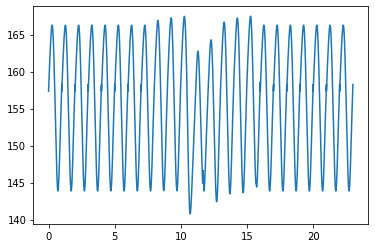

In [9]:
plt.plot(time_storm,WRRF_TSSConc)

In [10]:
### OLD Using ./data/flowPrecip.xlsx average dry-weather WRRF inflow is about 520.30 Mgal/d (1,969,500 m3/d, )
### OLD Average WRRF inflow is 2,788,860 m3/d

# Using GLWA WRRF model, steady-state flow is 2,100,000 m3/d
# Converting m3/d to m3/s ...
WRRFinflow = 2100000 / 86400
WRRFinflow

24.305555555555557

In [11]:
# Ratio to scale from sewer subsection to GLWA WRRF influent
# Ratio should be about 4.2885
scale_ratio = WRRFinflow/seweroutflow
scale_ratio

4.288405973772981

Text(0, 0.5, 'WRRF Flow (m3/s)')

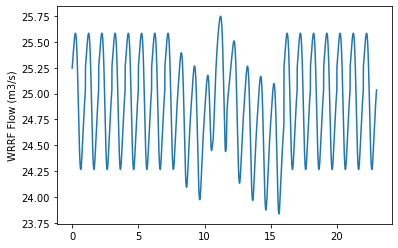

In [12]:
# Flow for GLWA WRRF influent
# Units of m3/s
plt.plot(time_storm,scale_ratio*sewer_flow)
plt.ylabel('WRRF Flow (m3/s)')

Text(0, 0.5, 'WRRF Flow (m3/d)')

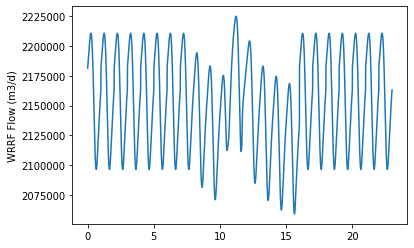

In [13]:
# Need flow for GLWA WRRF influent in units of m3/d (converted from m3/s)
WRRF_flow = scale_ratio*sewer_flow * 86400

plt.plot(time_storm,WRRF_flow)
plt.ylabel('WRRF Flow (m3/d)')

Text(0, 0.5, 'WRRF TSS Concentration (mg/L)')

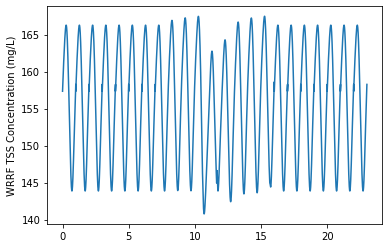

In [14]:
# TSS concentration for GLWA WRRF influent (same as that for sewer subsection since concentration)
plt.plot(time_storm,WRRF_TSSConc)
plt.ylabel('WRRF TSS Concentration (mg/L)')

In [15]:
# Using GLWA WRRF model, steady-state ...
# flow is 2,100,000 m3/d,
# TCOD is 210 mg TCOD/L,
# TKN is 20 mg N/L,
# influent TP is 2.2 mg P/L, 
# fraction of PO4 in TP is 53.3%, so influent SP is 1.1726 mg P/L,
# temperature is 10 C

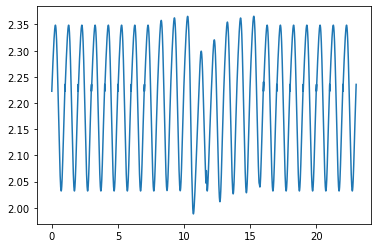

In [16]:
# For simplification, TCOD, TKN, and TP will mirror TSS dynamics
# TP will only include total phosphorus without fractionation
# The fraction of PO4 in TP will be kept at a constant value of 53.5%
# Temperature will be a constant value of 10 C

# TCOD concentration in mg/L
WRRF_TCODConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 210

# TKN concentration in mg/L
WRRF_TKNConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 20

# TP concentration in mg/L
WRRF_TPConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 2.2

# PO4 in TP in fraction
WRRF_frPO4TP = 0.533*np.ones_like(WRRF_TSSConc)

# Temperature in C
WRRF_T = 10*np.ones_like(WRRF_TSSConc)

# Non-influent related items

# Fe mass dose in kg/d
# For base-case, set as zero
Femass = np.zeros_like(WRRF_TSSConc)

# Primary clarifier solids fraction removal in fraction
# Assume steady-state of 70%
fXTSS_sludge = 0.7*np.ones_like(WRRF_TSSConc)

# Primary clarifier sludge flow in m3/d
# Assume steady-state of 20,000 m3/d
Qsludge_target = 20000*np.ones_like(WRRF_TSSConc)

plt.plot(time_storm,WRRF_TPConc)

In [17]:
storm_df = pd.DataFrame(data=np.column_stack((time_storm, # d
                                        WRRF_flow, # m3/d
                                        WRRF_TCODConc, # mg/L
                                        WRRF_TKNConc, # mg/L
                                        WRRF_TPConc, # mg/L
                                        WRRF_frPO4TP, # fraction
                                        WRRF_T, # C
                                        Femass, # kg/d
                                        fXTSS_sludge, # fraction
                                        Qsludge_target)), # m3/d
                  columns=['Sumo__Time',
                           'Sumo__Plant__Influent__param__Q',
                           'Sumo__Plant__Influent__param__TCOD',
                           'Sumo__Plant__Influent__param__TKN',
                           'Sumo__Plant__Influent__param__TP',
                           'Sumo__Plant__Influent__param__frSPO4_TP',
                           'Sumo__Plant__Influent__param__T',
                           'Sumo__Plant__Metal1__param__Femass',
                           'Sumo__Plant__Primary1__param__fXTSS_sludge',
                           'Sumo__Plant__Primary1__param__Qsludge_target'])
storm_df

,Sumo__Time,Sumo__Plant__Influent__param__Q,Sumo__Plant__Influent__param__TCOD,Sumo__Plant__Influent__param__TKN,Sumo__Plant__Influent__param__TP,Sumo__Plant__Influent__param__frSPO4_TP,Sumo__Plant__Influent__param__T,Sumo__Plant__Metal1__param__Femass,Sumo__Plant__Primary1__param__fXTSS_sludge,Sumo__Plant__Primary1__param__Qsludge_target
0,0.000000,2.181376e+06,212.148151,20.204586,2.222504,0.533,10.0,0.0,0.7,20000.0
1,0.000116,2.181393e+06,212.156021,20.205335,2.222587,0.533,10.0,0.0,0.7,20000.0
2,0.000231,2.181411e+06,212.163891,20.206085,2.222669,0.533,10.0,0.0,0.7,20000.0
3,0.000347,2.181429e+06,212.171762,20.206834,2.222752,0.533,10.0,0.0,0.7,20000.0
4,0.000463,2.181447e+06,212.179588,20.207580,2.222834,0.533,10.0,0.0,0.7,20000.0
...,...,...,...,...,...,...,...,...,...,...
198715,22.999537,2.163051e+06,213.368485,20.320808,2.235289,0.533,10.0,0.0,0.7,20000.0
198716,22.999653,2.163070e+06,213.376266,20.321549,2.235370,0.533,10.0,0.0,0.7,20000.0
198717,22.999769,2.163089e+06,213.384026,20.322288,2.235452,0.533,10.0,0.0,0.7,20000.0
198718,22.999884,2.163108e+06,213.391785,20.323027,2.235533,0.533,10.0,0.0,0.7,20000.0


In [18]:
with open(w_influentTSV,'w') as write_tsv:
    write_tsv.write(storm_df.to_csv(sep='\t', index=False))